# Taller 2
Juan Pablo Leal Jaramillo

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from numpy.linalg import eig
from sklearn.metrics import pairwise_distances
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

# 1. 

In [ ]:
paises_2 = pd.read_excel('Paises2.xlsx')
paises_2.tail()

,Pais,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11
15,Canadá,1.3,6,45,573695,554227,590,1602,49,-1.1,7854,14.4
16,Colombia,1.8,26,37,70263,43354,100,174,52,0.7,622,1.8
17,Congo,3.1,90,43,1784,435,8,20,58,0.2,331,1.6
18,Corea del Norte,1.8,26,45,12870,38000,47,687,74,0.0,1129,11.2
19,Corea del Sur,0.9,10,40,435137,164993,415,632,66,0.1,2982,6.6


In [ ]:
paises_2.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,1.745000,39.000000,39.300000,150981.850000,98212.700000,177.700000,485.500000,37.600000,0.400000,2009.700000,5.435000
std,1.176737,34.908904,8.651742,195560.377994,146594.796551,202.381375,489.887366,21.864174,1.046297,2219.516332,5.210745
min,-0.600000,6.000000,13.000000,1784.000000,6.000000,2.000000,20.000000,1.000000,-1.100000,20.000000,0.100000
25%,0.975000,12.250000,37.000000,7937.500000,3633.250000,11.000000,154.000000,19.750000,-0.050000,338.500000,1.150000
50%,1.700000,26.000000,41.000000,36604.000000,40677.000000,85.500000,270.500000,44.500000,0.100000,1017.500000,3.250000
75%,2.600000,59.250000,45.000000,257640.250000,109512.500000,355.000000,744.500000,52.250000,0.700000,3061.750000,9.950000
max,4.300000,124.000000,49.000000,579787.000000,554227.000000,590.000000,1602.000000,74.000000,4.100000,7854.000000,15.300000


## 1.1

Se crea una matriz con toda la informacion sin la columna del pais

In [ ]:
X = paises_2.iloc[:,1:].values
X.mean(axis=0)

array([1.7450000e+00, 3.9000000e+01, 3.9300000e+01, 1.5098185e+05,
       9.8212700e+04, 1.7770000e+02, 4.8550000e+02, 3.7600000e+01,
       4.0000000e-01, 2.0097000e+03, 5.4350000e+00])

Se entandarizan todos los datos mediante standard scaler

In [ ]:
X_standarized = StandardScaler().fit_transform(X)
X_standarized

array([[-0.64955357, -0.26451146,  0.20159678, -0.78056703, -0.66004874,
        -0.84002104, -0.81992424,  0.7226464 , -0.39223227, -0.77136178,
        -0.83385733],
       [ 1.0942144 ,  2.49816379,  0.79452847, -0.76890439, -0.68068101,
        -0.87043822, -0.89741388, -0.87280669,  0.2941742 , -0.88784957,
        -0.97168499],
       [ 2.22766358, -0.52902292, -3.11882071, -0.09150606, -0.05034681,
        -0.41418056,  0.02408462, -1.71745833, -0.39223227,  1.18165765,
         1.50921286],
       [ 0.65827241, -0.14695081, -1.81437098, -0.55806929, -0.54820893,
        -0.68793515, -0.63981317, -1.67053323,  0.39223227, -0.51018877,
        -0.47944335],
       [-0.38798837, -0.49963276, -0.98426661,  0.66864295, -0.22571415,
        -0.08973067,  1.16758049, -0.73203142, -0.2941742 , -0.2337614 ,
        -0.38099503],
       [-0.30079997, -0.96987535,  0.43876945,  0.98068541,  0.48250899,
         1.68460465,  0.93720586, -0.87280669, -0.39223227,  1.53990382,
         1.942

In [ ]:
distance_matrix = pairwise_distances(X_standarized)

Se obtiene la matriz de distancias

In [ ]:
distance_matrix

array([[0.        , 3.75251264, 6.03093057, 3.52738611, 3.3093411 ,
        5.48990447, 3.31230332, 4.90143777, 4.60747   , 3.03914722,
        2.74130532, 2.10120931, 3.78348159, 4.96183014, 2.01164625,
        7.94923582, 1.28855145, 2.57740656, 2.70921918, 3.90427477],
       [3.75251264, 0.        , 6.26886696, 3.89687199, 4.75791781,
        6.57761518, 5.53595117, 3.78977957, 6.16489377, 1.62142991,
        4.80825357, 2.44808995, 5.13852889, 6.5938242 , 2.50867342,
        9.10266152, 3.68078291, 2.1881512 , 4.80203347, 5.97487322],
       [6.03093057, 6.26886696, 0.        , 3.56742078, 4.4695894 ,
        5.19091143, 5.66156259, 6.85155252, 5.32679   , 6.49345309,
        5.85764558, 5.43329852, 6.17285459, 7.16431244, 5.33060079,
        7.58406903, 5.29385853, 6.00769652, 5.85916969, 6.0081456 ],
       [3.52738611, 3.89687199, 3.56742078, 0.        , 2.92907995,
        5.43503753, 4.5577305 , 4.18538248, 4.85808108, 4.06427692,
        4.32653624, 2.82221069, 4.7264012 , 6

## 1.2

Se saca la matriz de covarianza de la matriz ya estandarizada

In [ ]:
S_cov = np.cov(X_standarized.T)

Se obtienen los valores y los vectores propios de la matriz de covarianza

In [ ]:
vals, vectors = eig(S_cov)

Se obtienen las proyecciones de los planos de las dos primeras coordenadas principales para graficar

In [ ]:
Z1 = vectors[:,0]
Z2 = vectors[:,1]

In [ ]:
proy_Z1 = X_standarized @ Z1
proy_Z2 = X_standarized @ Z2

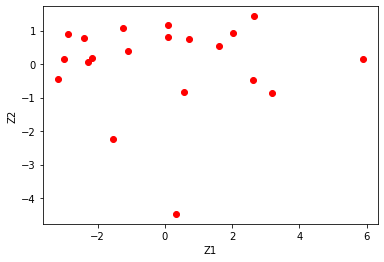

In [ ]:
plt.xlabel('Z1')
plt.ylabel('Z2')
plt.plot(proy_Z1, proy_Z2, 'ro')

Si existen varios outliers como se puede observar en la grafica. A toda la derecha hacia arriba se puede ver uno. Abajo en el centro hay otro y hacia la izquierda un poco hacia abajo tambien se puede observar uno.

## 1.3

Se crea una variable Y que contiene los paises

In [ ]:
Y = paises_2['Pais']

In [ ]:
paises_2.loc[paises_2['Pais'] == 'Colombia']

,Pais,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11
16,Colombia,1.8,26,37,70263,43354,100,174,52,0.7,622,1.8


Se crea un arreglo que contiene los valores para Colombia

In [ ]:
val_colombia = np.array([[1.8, 26, 37, 70263, 43354, 100, 174, 52, 0.7, 622, 1.8]])
val_colombia

array([[1.8000e+00, 2.6000e+01, 3.7000e+01, 7.0263e+04, 4.3354e+04,
        1.0000e+02, 1.7400e+02, 5.2000e+01, 7.0000e-01, 6.2200e+02,
        1.8000e+00]])

Se elimina del dataframe a Colombia y se vuelve a crear la matriz X de los valores sin los paises

In [ ]:
paises_2 = paises_2.drop(16)
X = paises_2.iloc[:,1:].values

Se crea el clasificador de KNN y luego se obtienen los valores de los vecinos de Colombia

In [ ]:
knn = KNeighborsClassifier(1)
knn.fit(X, Y)
neighbors_col = knn.kneighbors(val_colombia)
neighbors_col

(array([[34772.14902677]]), array([[3]]))

In [ ]:
paises_2.iloc[[3]]

,Pais,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11
3,Argelia,2.5,34,24,44609,19883,42,180,2,0.8,906,3.0


Se encuentra que Argelia es el vecino más cercano a Colombia

# 2.

Se prueba con la matriz $\begin{bmatrix}
10 & 3\\
10 & 0
\end{bmatrix}$

In [ ]:
matrix_dataX = np.array([[10, 3], [10, 0]])
distance_X = pairwise_distances(matrix_dataX)
distance_X

array([[0., 3.],
       [3., 0.]])

Se encuentra que para obtener la matriz $\begin{bmatrix}
0 & 3\\
3 & 0
\end{bmatrix}$ la matriz de distancia de la matriz de datos X es cualquier matriz de la forma $\begin{bmatrix}
x & 3\\
x & 0
\end{bmatrix}$ 

# 3.

In [ ]:
clientes_d1 = pd.read_csv('Clientes_D1.csv')
clientes_d1.tail()

,IDCliente,Sexo,Edad,IngresoDiario (miles),PuntajeGastos(1-100)
185,186,Male,30,99,97
186,187,Female,54,101,24
187,188,Male,28,101,68
188,189,Female,41,103,17
189,190,Female,36,103,85


In [ ]:
clientes_d1.describe()

,IDCliente,Edad,IngresoDiario (miles),PuntajeGastos(1-100)
count,190.000000,190.000000,190.000000,190.000000
mean,95.500000,39.157895,57.994737,50.147368
std,54.992424,14.196144,23.124347,25.618061
min,1.000000,18.000000,15.000000,1.000000
25%,48.250000,28.000000,40.000000,35.000000
50%,95.500000,36.000000,60.000000,50.000000
75%,142.750000,49.000000,76.000000,72.000000
max,190.000000,70.000000,120.000000,99.000000


Se elimina la columna IDCliente que no representa mucha información y tambien se reemplazan los valores de mujer y hombre por 0 y 1

In [ ]:
clientes_d1.drop(columns='IDCliente', inplace=True)

In [ ]:
clientes_d1 = clientes_d1.replace({'Sexo': {'Female': 0, 'Male': 1}})

## 3.1

Se crea el kmeans para los clientes con k=2 y se hace la predicción para cada uno de los registros dentro de la variable tag

In [ ]:
kmeans_clientes = KMeans(n_clusters=2, random_state=0).fit(clientes_d1)
tag = kmeans_clientes.predict(clientes_d1)

Se agrega la variable tag al dataframe

In [ ]:
clientes_d1['Tag'] = tag

In [ ]:
clientes_d1.iloc[[0]]

,Sexo,Edad,IngresoDiario (miles),PuntajeGastos(1-100),Tag
0,0,47,120,16,0


La prediccion para la primera persona es, como se indica en el tag, para el cluster 0

## 3.2

Se crean 15 clusters y se realiza el modelo de kmeans para los datos

In [ ]:
ct = range(1, 15)
kmeans_clientesd1 = [KMeans(n_clusters=i) for i in ct]
score = [kmeans_clientesd1[i].fit(clientes_d1).score(clientes_d1) for i in range(len(kmeans_clientesd1))]

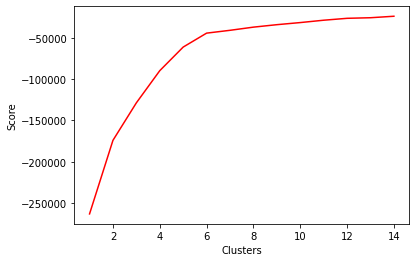

In [ ]:
plt.xlabel('Clusters')
plt.ylabel('Score')
plt.plot(ct, score, 'r')
plt.show()

Se puede ver que a partir del cluster k=6 se cambia la gráfica por lo que el k óptimo es igual a 6

## 3.3

Se crea el kmeans para los clientes con el k optimo k=6 y se hace la predicción para cada uno de los registros dentro de la variable tag_opt

In [ ]:
kmeans_clientes_opt = KMeans(n_clusters=6, random_state=0).fit(clientes_d1)
tag_opt = kmeans_clientes_opt.predict(clientes_d1)

Se agrega al dataframe la columna de la prediccion con el k optimo

In [ ]:
clientes_d1['tag_opt'] = tag_opt

In [ ]:
clientes_d1.iloc[[0]]

,Sexo,Edad,IngresoDiario (miles),PuntajeGastos(1-100),Tag,tag_opt
0,0,47,120,16,0,0


Con el k optimo la prediccion para el primer registro tambien es para el cluster 0

# 4.

$f(x)=arg min E((Y-c)^2)|X=x)$

$(Y-c)^2=((Y-E(Y|X)) + (E(Y|X)-c))^2=(y-E(Y|X))^2+(E(Y|X)-c)^2+2(Y-E(Y|X))(E(Y|X)-c)$

El primer término no depende de c. Significa también que cada vez que se usa MCO se esta estimando una esperanza condicional

Para cualquier variable aleatoria y, se tiene la proyección sobre el espacio generado por las $x, r(x) = x \beta$ donde:

$\beta = argmin E((y-xb)^2)$

Si la esperanza condicional es lineal entonces $E(Y|X)=x\beta$. 